In [1]:
import sys
sys.path.append('../src')

from audio_classifier import AudioClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
classifier = AudioClassifier(data_path="../data/features/audio_features.csv") 
classifier.load_data()

In [4]:
classifier.preprocess_data()

In [5]:
config = {"lstm_units": 128, "dropout_rate": 0.2, "dense_units": 16, "num_dense_layers": 2}

classifier.build_model(**config)
classifier.train_model(epochs=50, batch_size=32)

Epoch 1/50


C:\Users\redh0\PycharmProjects\MusicMind\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4564 - loss: 1.2954 - val_accuracy: 0.6985 - val_loss: 0.9341
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7214 - loss: 0.8917 - val_accuracy: 0.7824 - val_loss: 0.7204
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7664 - loss: 0.7015 - val_accuracy: 0.8321 - val_loss: 0.6105
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8367 - loss: 0.5428 - val_accuracy: 0.8282 - val_loss: 0.5481
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8604 - loss: 0.4259 - val_accuracy: 0.8321 - val_loss: 0.4771
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8790 - loss: 0.3568 - val_accuracy: 0.8588 - val_loss: 0.4534
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9009 - loss: 0.3195 - val_accuracy: 0.8473 - val_loss: 0.4537
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9070 - loss: 0.2467 - val_accuracy: 0.8550 - val_loss: 0.

In [6]:
loss, accuracy = classifier.evaluate_model()
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8693 - loss: 0.4120 
Test Loss: 0.3766
Test Accuracy: 0.8893


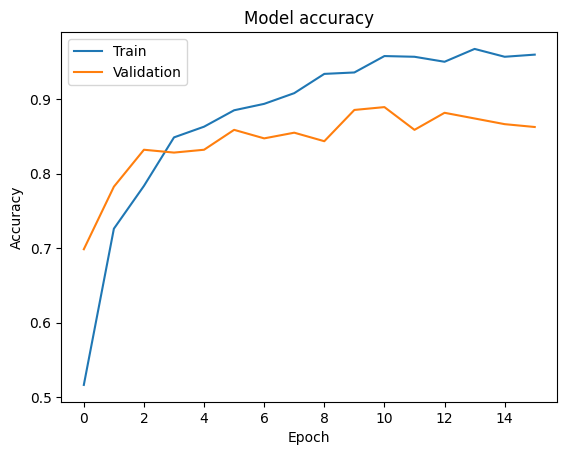

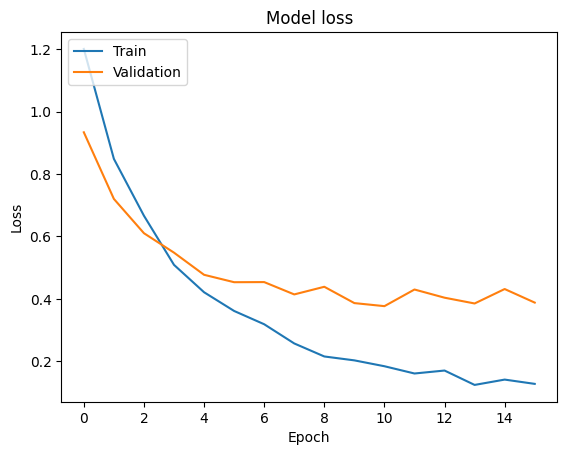

In [7]:
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(classifier.history.history['loss'])

plt.plot(classifier.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [8]:
classifier.save_model()
classifier.save_scaler()
classifier.save_label_encoder()

Modèle enregistré avec succès dans ../data/models\audio_classifier_model.h5
Scaler enregistré avec succès dans ../data/models\audio_scaler.pkl
LabelEncoder enregistré avec succès dans ../data/models\label_encoder.pkl
